In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
m_ins = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
m_ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
m_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
m_ins.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
m_ins.shape

(1338, 7)

In [6]:
m_ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
m_ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
m_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
m_ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
m_ins.isnull().sum().sum()

0

In [11]:
m_ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


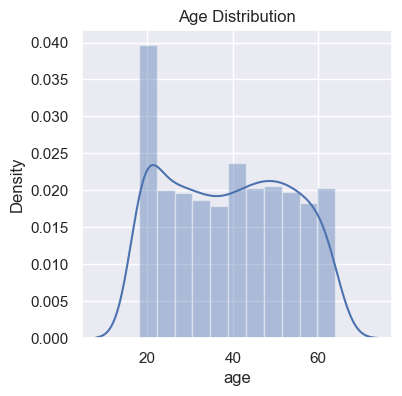

In [16]:
sns.set()
plt.figure(figsize = (4,4))
sns.distplot(m_ins['age'])
plt.title('Age Distribution')
plt.show()

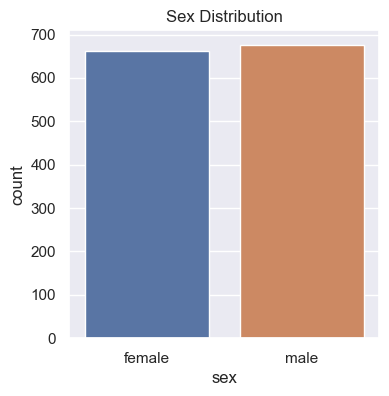

In [17]:
plt.figure(figsize = (4,4))
sns.countplot(x='sex', data = m_ins)
plt.title('Sex Distribution')
plt.show()

In [18]:
m_ins['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

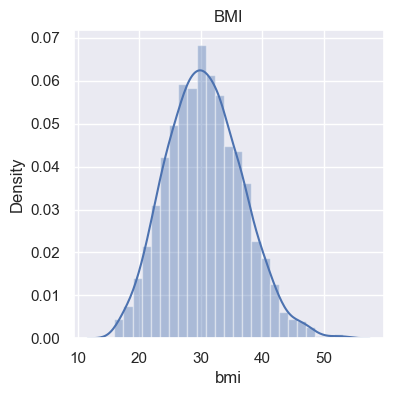

In [20]:
plt.figure(figsize = (4,4))
sns.distplot(m_ins['bmi'])
plt.title('BMI')
plt.show()

In [22]:
m_ins['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [24]:
m_ins['children'].nunique()

6

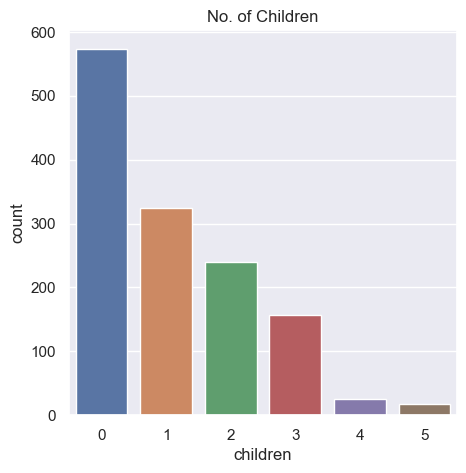

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(x='children', data = m_ins)
plt.title('No. of Children')
plt.show()

In [28]:
m_ins['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

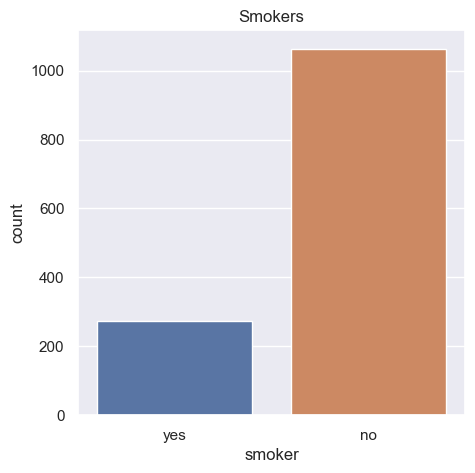

In [30]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data = m_ins)
plt.title('Smokers')
plt.show()

In [31]:
m_ins['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

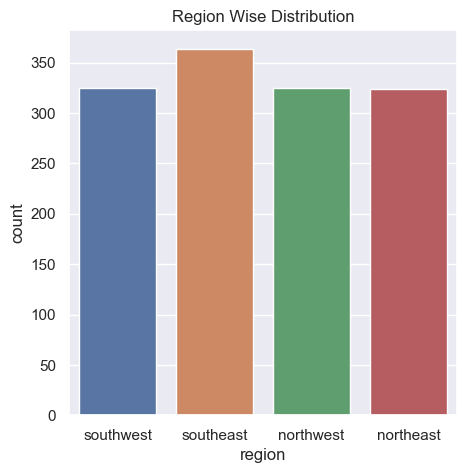

In [33]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data = m_ins)
plt.title('Region Wise Distribution')
plt.show()

In [34]:
m_ins['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

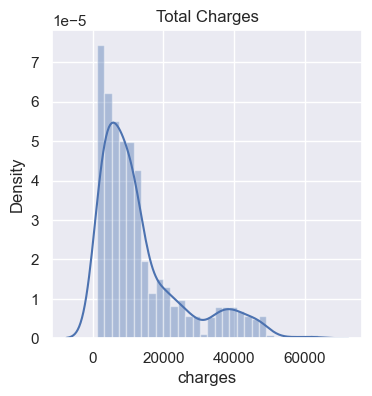

In [36]:
sns.set()
plt.figure(figsize = (4,4))
sns.distplot(m_ins['charges'])
plt.title('Total Charges')
plt.show()

In [42]:
m_ins.replace({'sex':{'male':0, 'female':1}}, inplace = True)

m_ins.replace({'smoker':{'yes':1,'no':0}}, inplace = True)

m_ins.replace({'region':{'southwest':0,'southeast':1,'northwest':2 ,'northeast':3}}, inplace = True)

m_ins

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [43]:
a = m_ins.drop(columns = 'charges', axis = 1)
b = m_ins['charges']

In [45]:
print(a)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       0
1      18    0  33.770         1       0       1
2      28    0  33.000         3       0       1
3      33    0  22.705         0       0       2
4      32    0  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       2
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       1
1336   21    1  25.800         0       0       0
1337   61    1  29.070         0       1       2

[1338 rows x 6 columns]


In [46]:
print(b)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [47]:
a_train, a_test, b_train, b_test = train_test_split(a,b, test_size = 0.2, random_state = 2)

In [48]:
print(a.shape, a_train.shape, a_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [49]:
print(b.shape, b_train.shape, b_test.shape)

(1338,) (1070,) (268,)


In [50]:
regressor = LinearRegression()

In [51]:
regressor.fit(a_train, b_train)

LinearRegression()

In [52]:
training_prediction = regressor.predict(a_train)

In [54]:
r2_train = metrics.r2_score(b_train, training_prediction)
print('R Squared Value :', r2_train)

R Squared Value : 0.7519923667088932


In [55]:
test_prediction = regressor.predict(a_train)

In [58]:
r2_test = metrics.r2_score(b_train, test_prediction)
print('R Squared Value :', r2_test)

R Squared Value : 0.7519923667088932


In [67]:
input_data = (31,1,25.74,0,0,1)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print(prediction)

[3911.4481614]


In [65]:
input_data = (31,0,36.3,2,1,0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print(prediction)

print('The insurance cost is USD', prediction[0])

[32129.30884852]
The insurance cost is USD 32129.308848515924
